<a href="https://colab.research.google.com/github/ChinthakindhiNishitha/Cricket_Scoreboard/blob/main/classification%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Copy of heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 115.1+ KB


In [82]:
df.describe()


,id,age,sex,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,0.789130,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,0.408148,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,1.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,1.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,1.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,1.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)



In [70]:
df_encoded = df_encoded.drop(columns=[col for col in df_encoded.columns if '_' in col])

In [71]:
df_encoded

,id,age,sex,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,1,145.0,233.0,150.0,2.3,0.0,0
1,2,67,1,160.0,286.0,108.0,1.5,3.0,2
2,3,67,1,120.0,229.0,129.0,2.6,2.0,1
3,4,37,1,130.0,250.0,187.0,3.5,0.0,0
4,5,41,0,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...
915,916,54,0,127.0,333.0,154.0,0.0,NaN,1
916,917,62,1,NaN,139.0,NaN,NaN,NaN,0
917,918,55,1,122.0,223.0,100.0,0.0,NaN,2
918,919,58,1,NaN,385.0,NaN,NaN,NaN,0


In [73]:
print(df_encoded.columns.tolist())

['id', 'age', 'sex', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [74]:
feature_cols=['id', 'age', 'sex', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
X = df_encoded[feature_cols] # 'num
y = df_encoded.num # Target variable



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # 'Male' → 1, 'Female' → 0

In [77]:
print(df_encoded.dtypes)

id            int64
age           int64
sex           int64
trestbps    float64
chol        float64
thalch      float64
oldpeak     float64
ca          float64
num           int64
dtype: object


In [78]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [79]:
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.5833333333333334


In [80]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus


In [85]:
print(sorted(y.unique()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [87]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names = ['No Disease', 'Mild', 'Moderate', 'Severe', 'Critical'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())



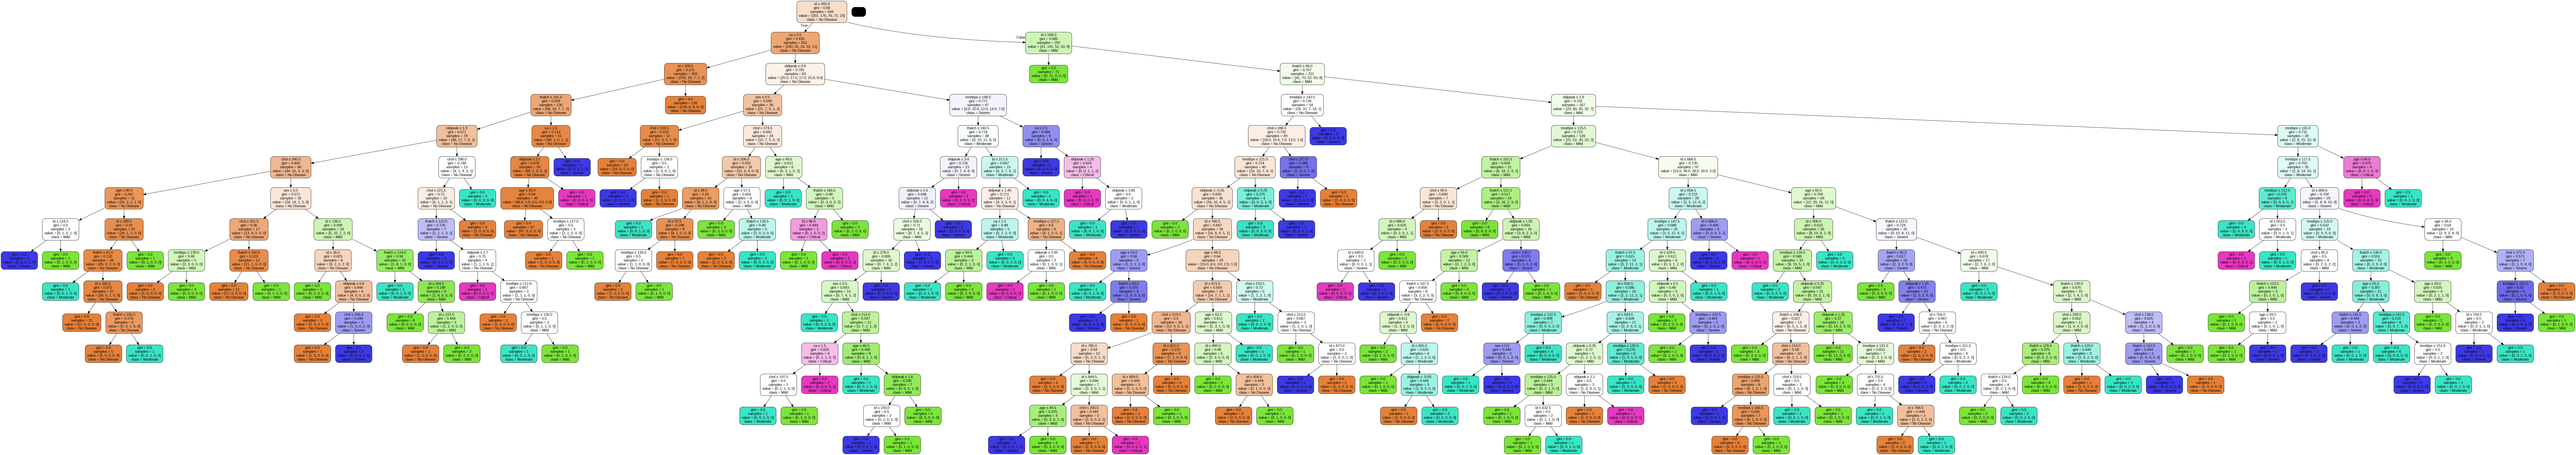

In [88]:
Image(graph.create_png())

In [89]:
graph.write_png("decision_tree.png")

True

Naives-Bayes model


In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [90]:
print(X_train.isnull().sum())       # Shows count of NaNs per column
print(np.isinf(X_train).sum())      # Shows count of infinite values

id            0
age           0
sex           0
trestbps     41
chol         24
thalch       39
oldpeak      45
ca          427
dtype: int64
id          0
age         0
sex         0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
dtype: int64


In [91]:
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

In [93]:
model=GaussianNB()
model.fit(X_train_clean,y_train_clean)

GaussianNB()

In [95]:
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

y_pred = model.predict(X_test_clean)

In [96]:
print("Accuracy:", accuracy_score(y_test_clean, y_pred))

Accuracy: 0.5


In [99]:
confu_matrix=confusion_matrix(y_test_clean,y_pred)
print(confu_matrix)

[[40  2  1  0  0]
 [13  2  2  2  3]
 [ 3  1  3  2  3]
 [ 2  4  3  1  3]
 [ 0  1  0  1  0]]


**SVM**


In [101]:
from sklearn import svm

In [103]:
s=svm.SVC(kernel="linear")

In [104]:
s.fit(X_train_clean,y_train_clean)
y_pred = s.predict(X_test_clean)

In [105]:
print("accuracy",accuracy_score(y_test_clean,y_pred))

accuracy 0.5217391304347826


In [111]:

from sklearn.neighbors import KNeighborsClassifier


In [115]:
knn = KNeighborsClassifier(n_neighbors=3)

In [117]:
knn.fit(X_train_clean, y_train_clean)

# Make predictions

y_pred = knn.predict(X_test_clean)

# Evaluate the model

accuracy = accuracy_score(y_test_clean, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.4891304347826087
